In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

from sklearn.datasets import make_classification
from tensorflow.keras.models import load_model

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.3)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory('./hist_images_truncated/train/', 
                                                    batch_size=16, subset="training", 
                                                    class_mode='binary', 
                                                    target_size=(200, 200))
valid_generator = train_datagen.flow_from_directory('./hist_images_truncated/train/', 
                                                    batch_size=16, subset="validation", 
                                                    class_mode='binary', 
                                                    target_size=(200, 200))
test_generator = test_datagen.flow_from_directory('./hist_images_truncated/test/', 
                                                  batch_size=16, 
                                                  class_mode='binary',
                                                  # Read note below 
                                                  shuffle=False,
                                                  target_size=(200, 200))

Found 36682 images belonging to 2 classes.
Found 15719 images belonging to 2 classes.
Found 22489 images belonging to 2 classes.


In [4]:
class_weights = {0:1, 1:2.5}

In [5]:
next(train_generator)[0].shape

(16, 200, 200, 3)

In [6]:
model2_1 = keras.models.Sequential([
    keras.applications.EfficientNetB0(input_shape=(200,200,3),weights='imagenet',include_top=False), 
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model2_1.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_effnetb0_class_weights_25.h5', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()
]

model2_1.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

history2_1 = model2_1.fit(train_generator,
                     validation_data = valid_generator,
                     callbacks = callbacks,
                     epochs = 15,
                     class_weight = class_weights)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 1280)       5120      
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [7]:
model2_1 = load_model('breast_cancer_effnetb0_class_weights_25.h5')

model2_1.evaluate(test_generator)

1406/1406 [==============================] - 50s 35ms/step - loss: 0.3148 - binary_accuracy: 0.8654 - precision: 0.8058 - recall: 0.7827 - auc: 0.9319


[0.31476595997810364,
 0.8654453158378601,
 0.8058010935783386,
 0.7826670408248901,
 0.931921124458313]

<AxesSubplot:ylabel='count'>

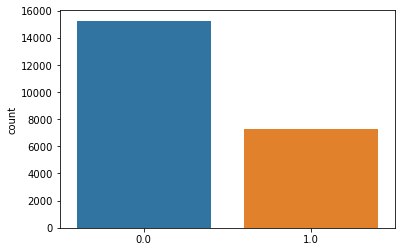

In [8]:
y_pred = model2_1.predict(test_generator)

import seaborn as sns
sns.countplot(x=np.round(np.squeeze(y_pred)))

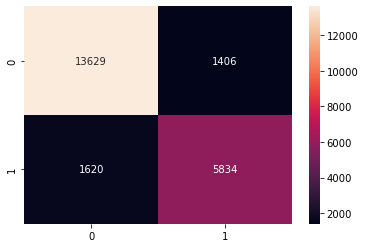

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

In [10]:
class_weights = {0:1, 1:2}

In [11]:
model2_2 = keras.models.Sequential([
    keras.applications.EfficientNetB0(input_shape=(200,200,3),weights='imagenet',include_top=False), 
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model2_2.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_effnetb0_class_weights_20.h5', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()
]

model2_2.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

history2_2 = model2_2.fit(train_generator,
                     validation_data = valid_generator,
                     callbacks = callbacks,
                     epochs = 15,
                     class_weight = class_weights)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 1280)       5120      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [12]:
model2_2 = load_model('breast_cancer_effnetb0_class_weights_20.h5')

model2_2.evaluate(test_generator)

1406/1406 [==============================] - 44s 30ms/step - loss: 0.2918 - binary_accuracy: 0.8803 - precision_1: 0.7921 - recall_1: 0.8662 - auc_1: 0.9422


[0.29178741574287415,
 0.8802970051765442,
 0.7920755743980408,
 0.8662462830543518,
 0.9421958923339844]

<AxesSubplot:ylabel='count'>

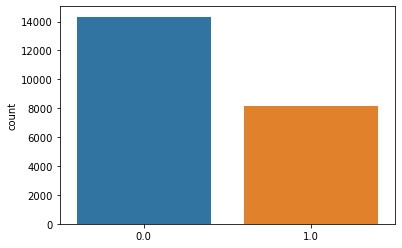

In [13]:
y_pred = model2_2.predict(test_generator)

import seaborn as sns
sns.countplot(x=np.round(np.squeeze(y_pred)))

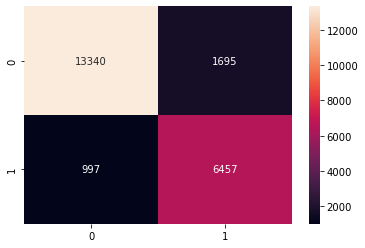

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

In [15]:
class_weights = {0:1, 1:3}

In [16]:
model2_3 = keras.models.Sequential([
    keras.applications.EfficientNetB0(input_shape=(200,200,3),weights='imagenet',include_top=False), 
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model2_3.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_effnetb0_class_weights_30.h5', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()
]

model2_3.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

history2_3 = model2_3.fit(train_generator,
                     validation_data = valid_generator,
                     callbacks = callbacks,
                     epochs = 6,
                     class_weight = class_weights)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 batch_normalization_2 (Batc  (None, 7, 7, 1280)       5120      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [17]:
model2_3 = load_model('breast_cancer_effnetb0_class_weights_30.h5')

model2_3.evaluate(test_generator)

1406/1406 [==============================] - 42s 29ms/step - loss: 0.3456 - binary_accuracy: 0.8649 - precision_2: 0.7590 - recall_2: 0.8679 - auc_2: 0.9298


[0.34555065631866455,
 0.8648672699928284,
 0.759005069732666,
 0.8678562045097351,
 0.9298173189163208]

<AxesSubplot:ylabel='count'>

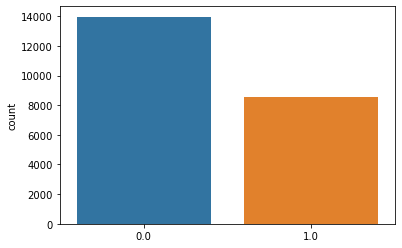

In [18]:
y_pred = model2_3.predict(test_generator)

import seaborn as sns
sns.countplot(x=np.round(np.squeeze(y_pred)))

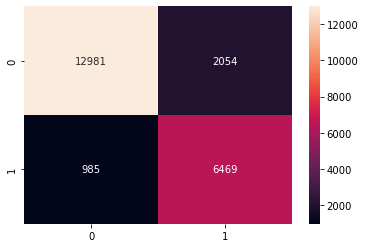

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()